In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.integrate import solve_ivp

In [ ]:
import astropy.constants as ac

#Constants to be used later
GMsun = ac.GM_sun.value                                  #G*(Solar Mass)
c = ac.c.value                                           #Speed of light in vacuum
dsun = GMsun/(c**2)                                      #Natural length scale
tsun = GMsun/(c**3)                                      #Natural time scale
pc = ac.pc.value                                         #One parsec
yr = (365.25)*(24)*(60)*(60)                             #Seconds in one year

In [ ]:
def domg_dt(omg,Mc,eta):
  tN_omg=Mc*omg*tsun
  nu=1
  res=(96/5*omg**2*tN_omg**(5/3)*(1+(59/18*eta**(6/5)+13661/2016*eta**(1/5)+34103/18144/
  eta**(4/5))*tN_omg**(4/3)*nu**2+4/eta**(3/5)*nu**(3/2)*pi*tN_omg+(-11/4*eta**(3/5)- 43/336/eta**(2/5))*tN_omg**(2/3)*nu))
  return res


In [ ]:
domg_dt(1e-9,1e8,0.25)

np.float64(5.897729367069349e-28)

In [ ]:
# Define the get_PHI_omg function
def get_PHI_omg(tarr, t0, phi0, omg0, Mc, eta):
    # Define the system of ODEs
    def odes(t, y):
        phi, omg = y
        dphi_dt = omg
        domg_dt_val = domg_dt(omg, Mc, eta)
        return [dphi_dt, domg_dt_val]

    y0 = [phi0, omg0]

    # Solve the ODEs
    solution = solve_ivp(
        fun=odes,
        t_span=(tarr[0], tarr[-1]),  # t_span should be a tuple of (start, end)
        y0=y0,
        method='RK45',
        t_eval=tarr,  # Points at which to evaluate the solution
        rtol=1e-6,
        atol=1e-8
    )

    # Extract results
    t = solution.t
    phi, omg = solution.y

    return phi, omg

In [ ]:
# Example usage
tarr = np.linspace(0, 10, 100)*yr
t0 = 0
phi0 = 0
omg0 = 132.73e-9
M=5e9
eta = 1/4
Mc=M*eta**(3/5)


phi, omg = get_PHI_omg(tarr, t0, phi0, omg0, Mc, eta)


In [ ]:
np.log10(Mc)
Mc

2176376408.24031

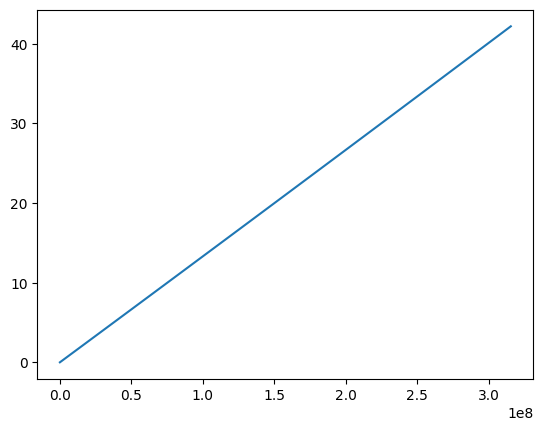

In [ ]:
plt.plot(tarr,phi)
#plt.plot(tarr,omg)
plt.show()

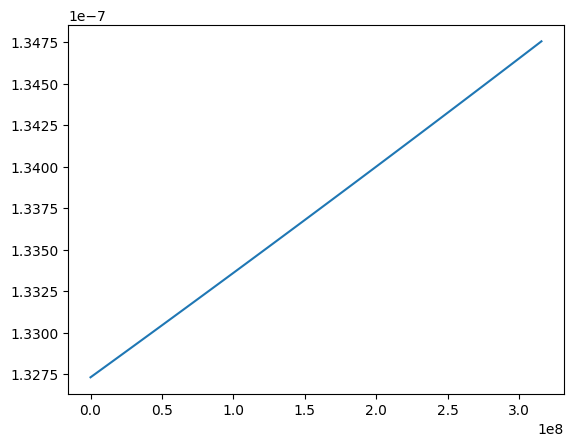

In [ ]:
plt.plot(tarr,omg)

In [ ]:
#Defining function for omega(t)
def Omega_ext(t, t0, omega0, Mc, eta, N):
    '''
    t = time
    t0 = reference epoch
    omega0 = omega(t0)
    M = total mass of the SMBHB
    eta = symmetric mass ratio
    N = 0, 1, 1.5 or 2 (0--> Newtonian order, 1--> Upto 1PN, 1.5--> Upto 1.5PN, 2--> Upto 2PN)
    '''

    #Defining some parameters/scaled variables
    #Mc = (M)*((eta)**(3/5))
    M=Mc/((eta)**(3/5))
    tm_ = tsun*M*omega0
    tau = 1 - (((256)*((Mc)**(5/3))*((tsun)**(5/3))*((omega0)**(8/3))*(t - t0))/5)

    if N==0:
        return omega0/(tau**(3/8))

    if N==1:
        return omega0*( 1 / tau**(3/8) + ((11/8 * eta + 743/672) / tau**(5/8) + (-11/8 * eta - 743/672) / tau**(11/8) ) * tm_**(2/3) )

    elif N==1.5:
        return omega0*( 1 / tau**(3/8) + ((11/8 * eta + 743/672) / tau**(5/8) + (-11/8 * eta - 743/672) / tau**(11/8) ) * tm_**(2/3) + (12/5 / tau**(11/8) * np.pi - 12/5 / tau**(3/4) * np.pi) * tm_ )

    elif N==2:
        return omega0*( 1 / tau**(3/8) + ((11/8 * eta + 743/672) / tau**(5/8) + (-11/8 * eta - 743/672) / tau**(11/8) ) * tm_**(2/3) + (12/5 / tau**(11/8) * np.pi - 12/5 / tau**(3/4) * np.pi) * tm_ + ( (371/128 * eta**2 + 56975/16128 * eta + 1855099/903168) / tau**(7/8)
        + (-617/192 * eta**2 - 5429/1344 * eta - 3058673/1354752) / tau**(11/8) + (-605/192 * eta**2 - 40865/8064 * eta - 2760245/1354752) / tau**(13/8) + (1331/384 * eta**2 + 89903/16128 * eta + 6072539/2709504) / tau**(19/8) ) * tm_**(4/3) )

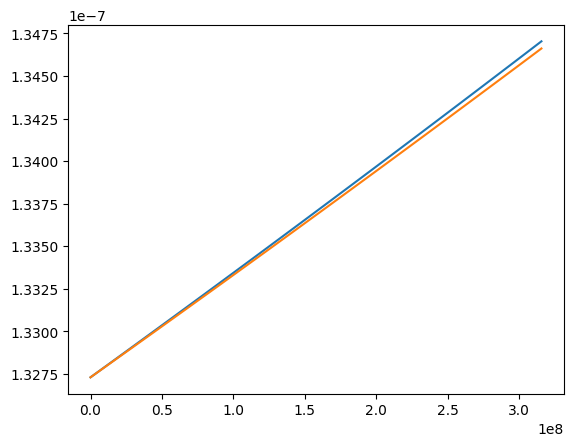

In [ ]:
plt.plot(tarr,Omega_ext(tarr, t0, omg0, Mc, eta, 0))
plt.plot(tarr,Omega_ext(tarr, t0, omg0, Mc, eta, 2))
plt.show()

In [ ]:
def Omega(t, t0, omega0, Mc, eta, N):
  return Omega_ext(t, t0, omega0, Mc, eta, N)-Omega_ext(t0, t0, omega0, Mc, eta, N)+omega0

In [ ]:
#Expression for Phi(t) (upto 2PN)
def Phi(t, t0, phi0, omega0, Mc, eta, N):
    '''
    t = time
    t0 = reference epoch
    phi0 = phi(t0)
    omega0 = omega(t0)
    M = total mass of the SMBHB
    eta = symmetric mass ratio
    N = 0, 1, 1.5 or 2 (0--> Newtonian order, 1--> Upto 1PN, 1.5--> Upto 1.5PN, 2--> Upto 2PN)
    '''

    #Defining function for 'indefinite' Phi(omega)
    def phi(t, t0, phi0, omega0, Mc, eta, N):

        #Getting omega(t)
        omg = Omega_ext(t, t0, omega0, Mc, eta, N)

        #Defining some parameters/scaled variables
        #Mc = (M)*((eta)**(3/5))
        tN_omg = tsun*Mc*omg

        #Getting phi(t)
        if N==0:
            return - 1 / (32 * tN_omg**(5/3))

        elif N==1:
            return - 1 / (32 * tN_omg**(5/3)) + (-55/384 * eta**(3/5) - 3715/32256 / eta**(2/5)) / tN_omg

        elif N==1.5:
            return - 1 / (32 * tN_omg**(5/3)) + (-55/384 * eta**(3/5) - 3715/32256 / eta**(2/5)) / tN_omg + 5 / (16 * tN_omg**(2/3) * eta**(3/5)) * np.pi

        elif N==2:
            return - 1 / (32 * tN_omg**(5/3)) + (-55/384 * eta**(3/5) - 3715/32256 / eta**(2/5)) / tN_omg + 5 / (16 * tN_omg**(2/3) * eta**(3/5)) * np.pi + (-3085/4608 * eta**(6/5) - 27145/32256 * eta**(1/5) - 15293365/32514048 / eta**(4/5)) / tN_omg**(1/3)

    return phi(t, t0, phi0, omega0, Mc, eta, N) - phi(t0, t0, phi0, omega0, Mc, eta, N) + phi0

In [ ]:
phi_ana=Phi(tarr, t0, phi0, omg0, Mc, eta, 2)

In [ ]:
tarr/yr

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [ ]:
omg0*yr

4.188640248

In [ ]:
omg/omg0

array([1.        , 1.0001499 , 1.00029989, 1.00044996, 1.00060012,
       1.00075036, 1.00090068, 1.00105108, 1.00120157, 1.00135214,
       1.0015028 , 1.00165354, 1.00180436, 1.00195527, 1.00210626,
       1.00225734, 1.0024085 , 1.00255974, 1.00271107, 1.00286249,
       1.00301398, 1.00316557, 1.00331723, 1.00346899, 1.00362082,
       1.00377275, 1.00392475, 1.00407684, 1.00422902, 1.00438129,
       1.00453363, 1.00468607, 1.00483859, 1.00499119, 1.00514388,
       1.00529666, 1.00544952, 1.00560247, 1.0057555 , 1.00590862,
       1.00606183, 1.00621512, 1.0063685 , 1.00652197, 1.00667552,
       1.00682916, 1.00698289, 1.0071367 , 1.0072906 , 1.00744459,
       1.00759866, 1.00775282, 1.00790707, 1.00806141, 1.00821583,
       1.00837034, 1.00852494, 1.00867962, 1.0088344 , 1.00898926,
       1.00914421, 1.00929925, 1.00945437, 1.00960958, 1.00976489,
       1.00992028, 1.01007576, 1.01023132, 1.01038698, 1.01054272,
       1.01069856, 1.01085448, 1.01101049, 1.01116659, 1.01132

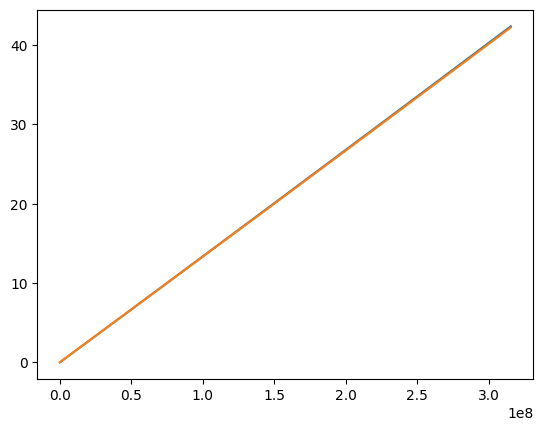

In [ ]:
plt.plot(tarr,Phi(tarr, t0, phi0, omg0, Mc, eta, 2))
plt.plot(tarr,Phi(tarr, t0, phi0, omg0, Mc, eta, 0))

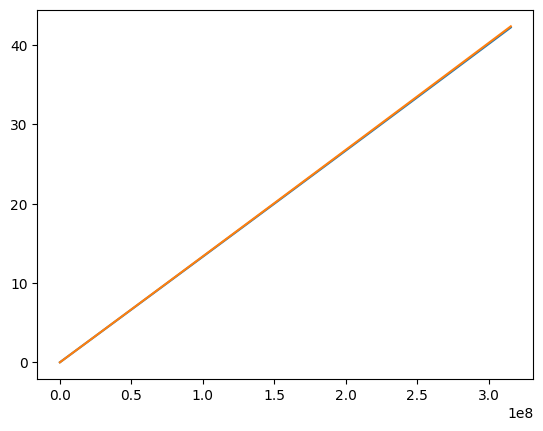

In [ ]:
plt.plot(tarr,phi)
plt.plot(tarr,phi_ana)
#plt.plot(tarr,omg)
plt.show()

In [ ]:
omg_ana=Omega(tarr, t0,  omg0, Mc, eta, 2)

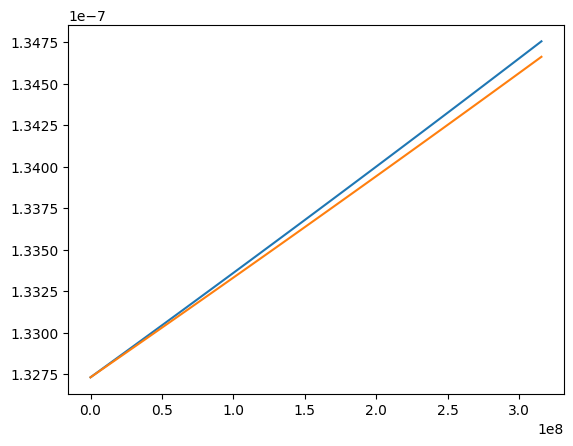

In [ ]:
plt.plot(tarr,omg)
plt.plot(tarr,omg_ana)
#plt.plot(tarr,omg)
plt.show()

In [ ]:
sh=int(1e6)
tarr_=np.random.uniform(0,40,sh)
phi0_=np.random.uniform(0,2*pi,sh)
lomg_0=np.random.uniform(-10,-6,sh)
lM_=np.random.uniform(7,11,sh)
eta_=np.random.uniform(0.01,0.25,sh)

In [ ]:
eta_

array([0.19511894, 0.21734501, 0.11782678, ..., 0.08933628, 0.17155545,
       0.1149844 ])

In [ ]:
sh = int(1e6)

# Define low and high bounds for each dimension
lows = [0, 0, -10, 7, 0.1]              # Lower bounds: tarr_, phi0_, lomg_0, lM_, eta_
highs = [40, 2 * pi, -7, 10, 0.25]       # Upper bounds: tarr_, phi0_, lomg_0, lM_, eta_

# Generate 5D uniform random samples in one call
samples = np.random.uniform(low=lows, high=highs, size=(sh, 5))

In [ ]:
samples[50]

array([30.26681083,  5.71103088, -9.16833151,  7.37748607,  0.23297669])

In [ ]:
samples[:,4]

array([0.20372572, 0.23345611, 0.13977688, ..., 0.22331472, 0.1559195 ,
       0.227671  ])

In [ ]:
10*samples[1,2]

np.float64(-74.67905174966933)

In [ ]:
phi_arr=Phi(samples[:,0]*yr, 0, samples[:,1], 10**samples[:,2], 10**samples[:,3], samples[:,4], 2)/(2*pi)

In [ ]:
Phi(17.7331*yr,  0,5.5556, 10**(-7.5040),  10**7.2940,  0.2057,2)/(2*pi)

np.float64(3.6748738619629697)

In [ ]:
phi_arr.shape

(1000000,)

In [ ]:
[17.7331,  5.5556, -7.5040,  7.2940,  0.2057

In [ ]:
nan_count = np.isnan(phi_arr).sum()
nan_count

np.int64(0)

In [ ]:
np.min(phi_arr)

In [ ]:
samples[int(np.where(phi_arr==np.max(phi_arr))[0][0])]

In [ ]:
Phi

In [ ]:
phi_arr==np.max(phi_arr)

In [ ]:
np.where(phi_arr>20)

In [ ]:
omg_arr=Omega(samples[:,0]*yr, 0, 10**samples[:,2], 10**samples[:,3], samples[:,4], 2)

In [ ]:
Omega

In [ ]:
omg_arr[5],phi_arr[5]

In [ ]:
samples[:,2]

In [ ]:
samples.shape

In [ ]:
data=np.concatenate([samples, omg_arr.reshape(-1, 1), phi_arr.reshape(-1, 1)], axis=1)

In [ ]:
data.shape

In [ ]:
samples[5]

In [ ]:
data[5]

In [ ]:
import torch
data_tensor = torch.from_numpy(data).float()  # Convert to float32 for compatibility

# Save the tensor to a .pt file
torch.save(data_tensor, 'data.pt')

In [ ]:
data[1]

array([ 2.81655995e+01,  3.56887071e+00, -7.46790517e+00,  8.18194280e+00,
        2.33456109e-01,  3.40486877e-08,  5.38463455e+00])